In [15]:
%pip install xgboost


In [35]:
from datetime import datetime 
import tensorflow as tf 
from tensorflow import keras 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
import numpy as np 
import seaborn as sb 

In [36]:
df = pd.read_csv('^NSEI (1) (1).csv', encoding= 'unicode_escape')

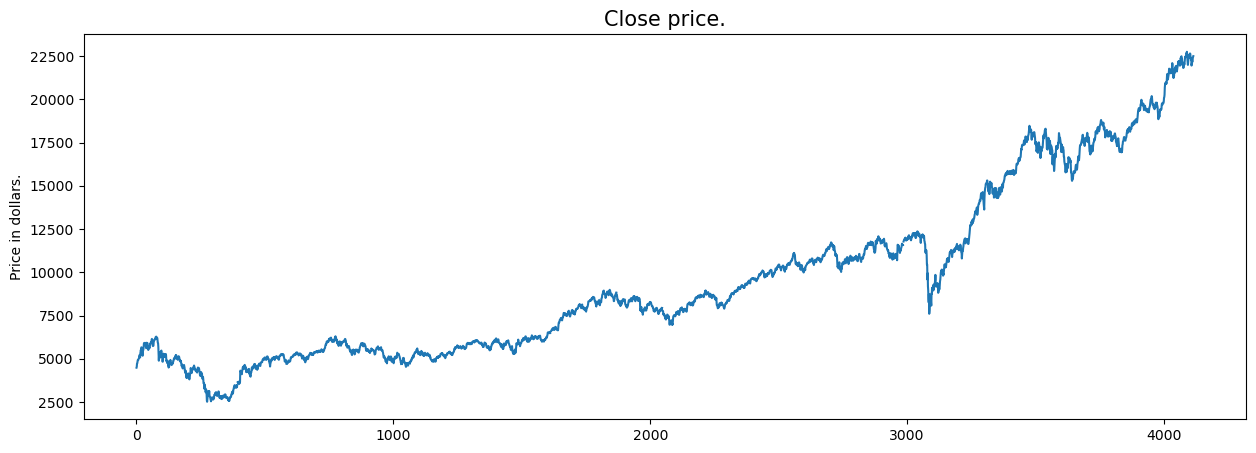

In [37]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [38]:
df[df['Close'] == df['Adj Close']].shape

(4085, 7)

In [39]:
df = df.drop(['Adj Close'], axis=1)

In [40]:
df.isnull().sum()

Date       0
Open      30
High      30
Low       30
Close     30
Volume    30
dtype: int64

In [41]:
df.dropna()

,Date,Open,High,Low,Close,Volume
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,0.0
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,0.0
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,0.0
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,0.0
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,0.0
...,...,...,...,...,...,...
4110,2024-05-14,22112.900391,22270.050781,22081.250000,22217.849609,230200.0
4111,2024-05-15,22255.599609,22297.550781,22151.750000,22200.550781,231900.0
4112,2024-05-16,22319.199219,22432.250000,22054.550781,22403.849609,368900.0
4113,2024-05-17,22415.250000,22502.150391,22345.650391,22466.099609,242700.0


In [42]:
df=df.dropna()

In [43]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [44]:
q1 = df['Close'].quantile(0.25)
q3 = df['Close'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
df = df[df['Close'] <= upper_bound]

In [45]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


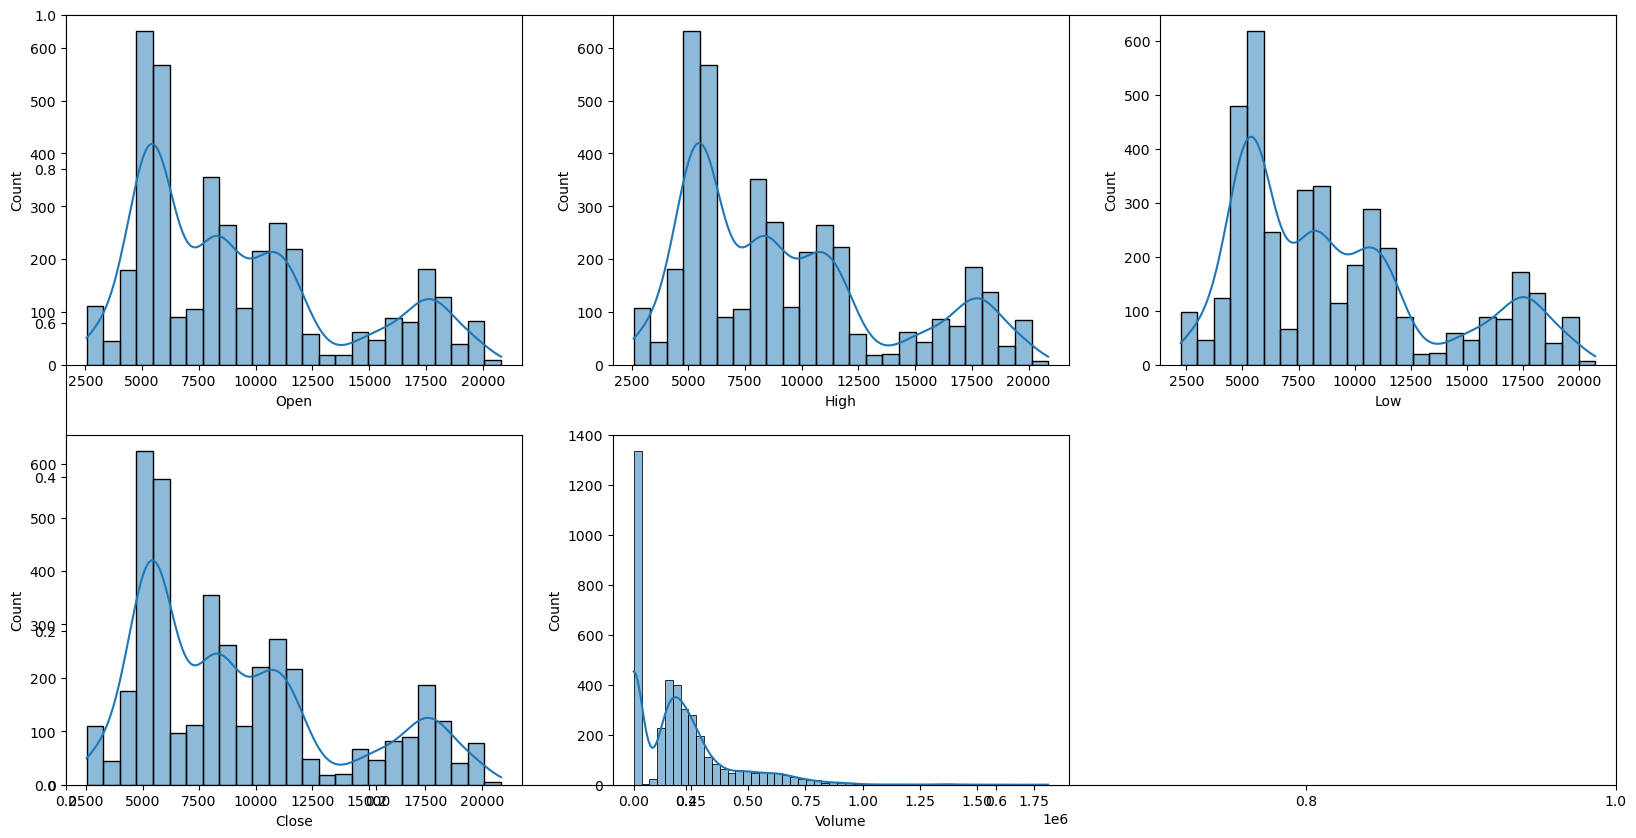

In [47]:
plt.subplots(figsize=(20, 10))

for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sb.histplot(df[col], kde=True) 
plt.show()


In [48]:
splitted = df['Date'].str.split('/', expand=True)
print(splitted.head())  # To see the structure of the split


            0
0  2007-09-17
1  2007-09-18
2  2007-09-19
3  2007-09-20
4  2007-09-21


In [49]:
# Remove rows where the split didn't return the correct number of parts
splitted = df['Date'].str.split('-', expand=True)

# Ensure the split result has 3 columns (day, month, year)
if splitted.shape[1] == 3:
    df['day'] = splitted[1].astype(int)
    df['month'] = splitted[0].astype(int)
    df['year'] = splitted[2].astype(int)
else:
    print("Error: Date format is not consistent or has missing values.")


In [50]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Extract day, month, year
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year


In [51]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,0.0,17,9,2007,1
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,0.0,18,9,2007,1
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,0.0,19,9,2007,1
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,0.0,20,9,2007,1
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,0.0,21,9,2007,1


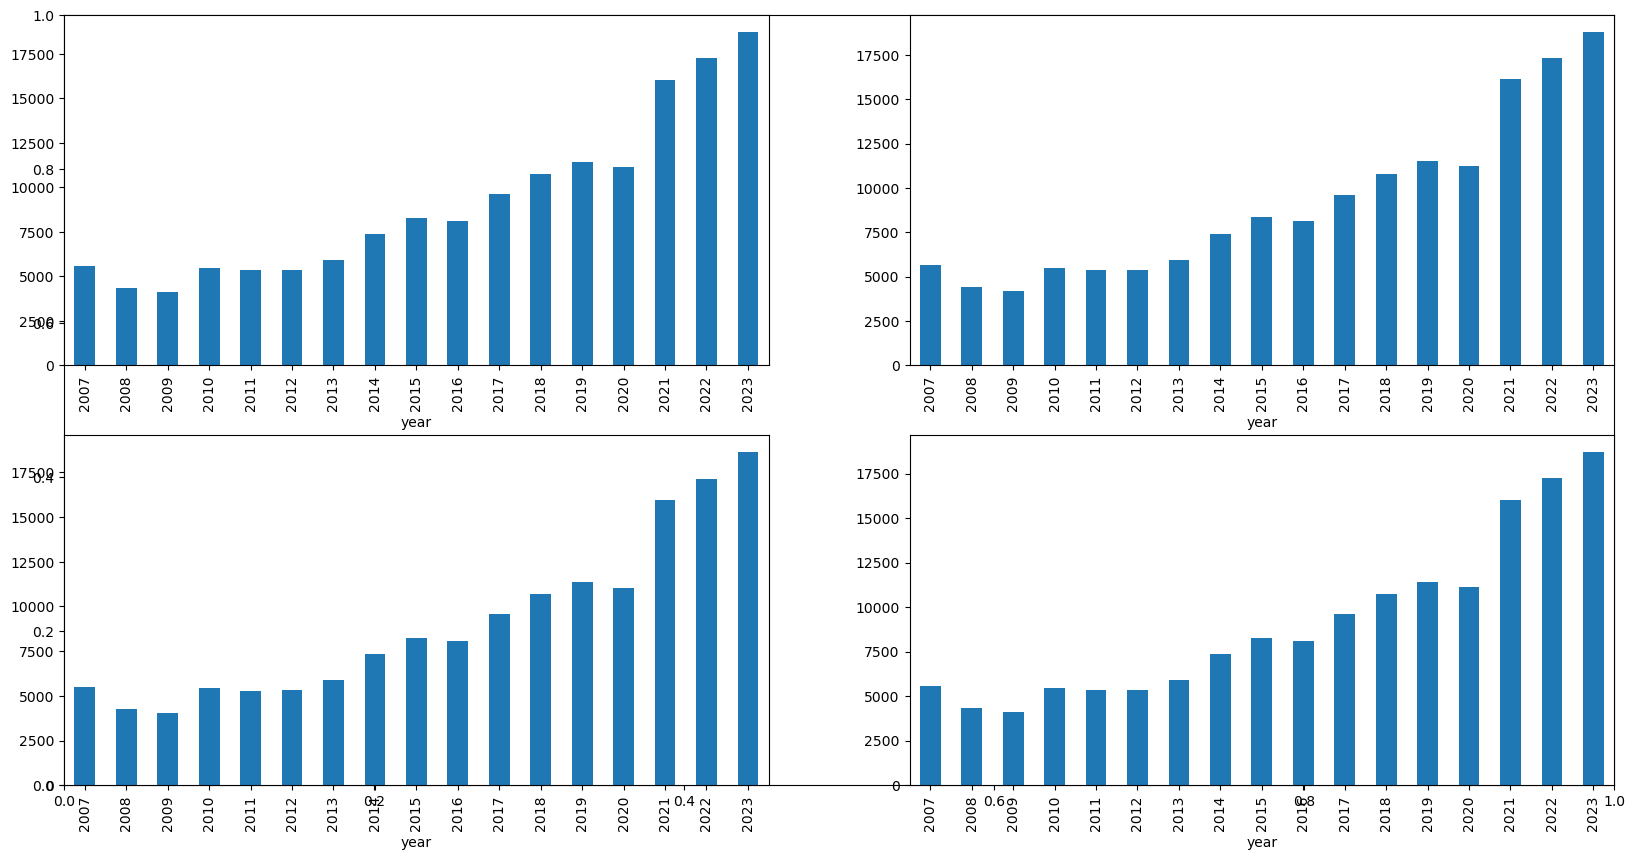

In [52]:
data_grouped = df.drop('Date', axis=1).groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [53]:
df.drop('Date', axis=1).groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,9266.252279,9316.638406,9199.799483,9259.569534,197551.007222,15.844546,6.068795,2015.378943
1,9193.908301,9247.379166,9127.478479,9188.926207,199268.154762,15.721726,7.549107,2015.241815


In [54]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

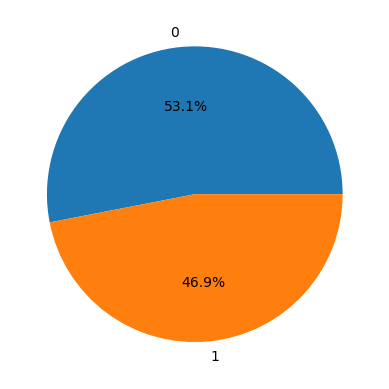

In [55]:
plt.pie(df['target'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

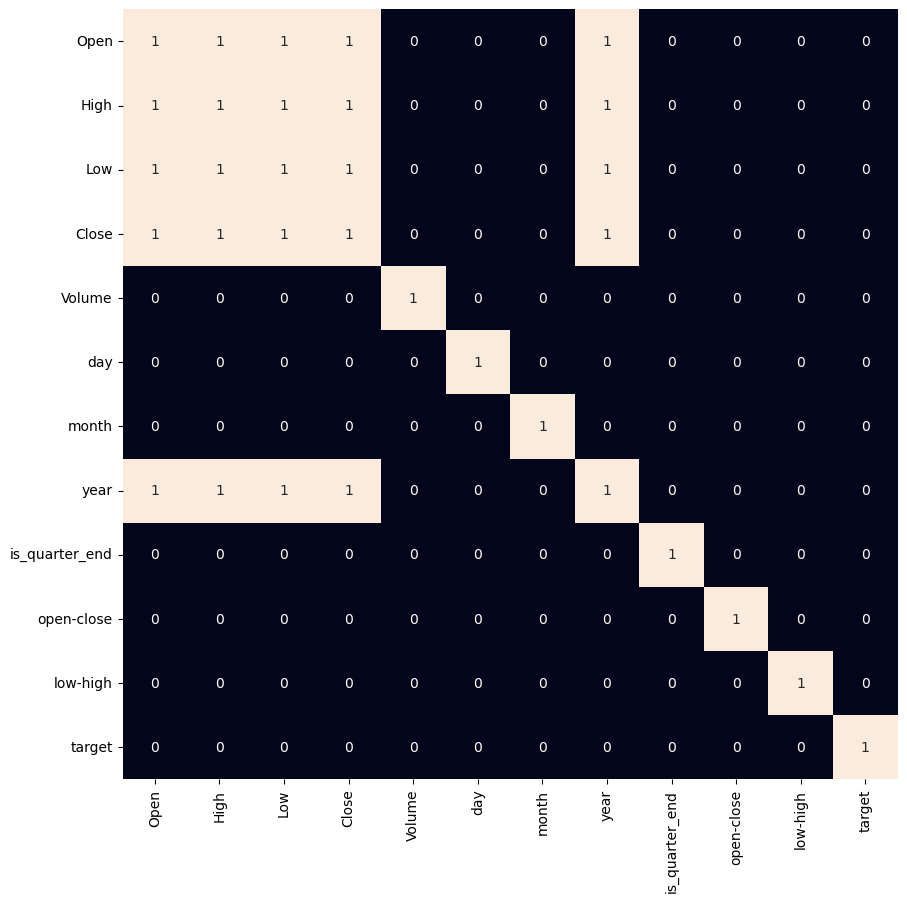

In [56]:
plt.figure(figsize=(10, 10)) 

# As our concern is with the highly 
# correlated features only so, we will visualize 
# our heatmap as per that criteria only. 
sb.heatmap(df.drop('Date', axis=1).corr() > 0.9, annot=True, cbar=False)
plt.show()

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'features' is your feature matrix and 'target' is your target vector
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Splitting the data
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)

print(X_train.shape, X_valid.shape)


(3577, 3) (398, 3)


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Creating a list of models
models = [
    LogisticRegression(),
    SVC(kernel='poly', probability=True),
    XGBClassifier()
]

# Training the models
for i in range(3):
    models[i].fit(X_train, Y_train)


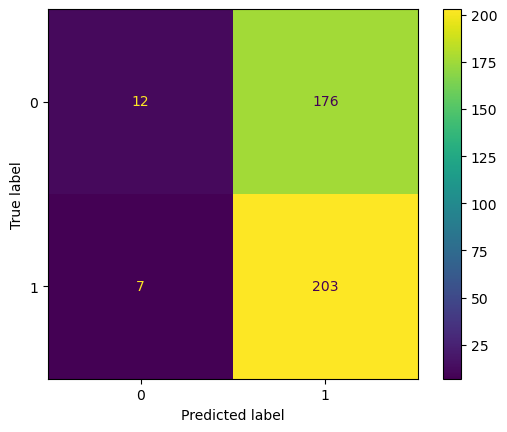

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.show()

In [63]:
print(df.shape)  # Should show (n_samples, n_features)


(3975, 13)


In [64]:
# prepare the training set samples 
df_close = df.filter(['Close']) 
dataset = df_close.values 
training = int(np.ceil(len(dataset) * 0.95)) 

# scale the data 
ss = StandardScaler()

# Apply StandardScaler only if dataset has valid features
if dataset.shape[1] > 0:
    scaled_data = ss.fit_transform(dataset)
    print(scaled_data)
else:
    print("Dataset has no features to scale.")

train_data = scaled_data[0:int(training), :]  

x_train = [] 
y_train = [] 

# considering 60 as the batch size, 
# create the X_train and y_train 
for i in range(60, len(train_data)): 
	x_train.append(train_data[i-60:i, 0]) 
	y_train.append(train_data[i, 0]) 

x_train, y_train = np.array(x_train), \
                   np.array(y_train)
X_train = np.reshape(x_train, 
					(x_train.shape[0], 
					x_train.shape[1], 1)) 


[[-1.05105294]
 [-1.03962462]
 [-0.99835653]
 ...
 [ 2.44576245]
 [ 2.53862963]
 [ 2.57594026]]


In [65]:
model = keras.models.Sequential() 
model.add(keras.layers.LSTM(units=64, 
                            return_sequences=True, 
                            input_shape 
                            =(X_train.shape[1], 1))) 
model.add(keras.layers.LSTM(units=64)) 
model.add(keras.layers.Dense(128)) 
model.add(keras.layers.Dropout(0.5)) 
model.add(keras.layers.Dense(1)) 
  
print(model.summary()) 

C:\Users\Diptansu Bebarta\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [66]:
from keras.metrics import RootMeanSquaredError 

# Compile the model with the metric inside a list
model.compile(optimizer='adam', 
              loss='mae', 
              metrics=[RootMeanSquaredError()])  # Wrap it in a list

# Fit the model
history = model.fit(X_train, y_train, 
                    epochs=20)


Epoch 1/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - loss: 0.1948 - root_mean_squared_error: 0.2940
Epoch 2/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0831 - root_mean_squared_error: 0.1229
Epoch 3/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0710 - root_mean_squared_error: 0.1034
Epoch 4/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0772 - root_mean_squared_error: 0.1124
Epoch 5/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0755 - root_mean_squared_error: 0.1078
Epoch 6/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0712 - root_mean_squared_error: 0.1012
Epoch 7/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0705 - root_mean_squared_error: 0.1007
Epoch 8/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0662 - root_mean_squared_error: 0.0943
Epoch 9/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0640 - root_mean_squared_error: 0.0913
Epoch 10/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0648 - root_mean_

In [ ]:
testing = scaled_data[training - 60:, :]
x_test = [] 
y_test = dataset[training:, :] 
for i in range(60, len(testing)): 
	x_test.append(testing[i-60:i, 0]) 

x_test = np.array(x_test) 
X_test = np.reshape(x_test, 
					(x_test.shape[0], 
					x_test.shape[1], 1)) 

pred = model.predict(X_test) 


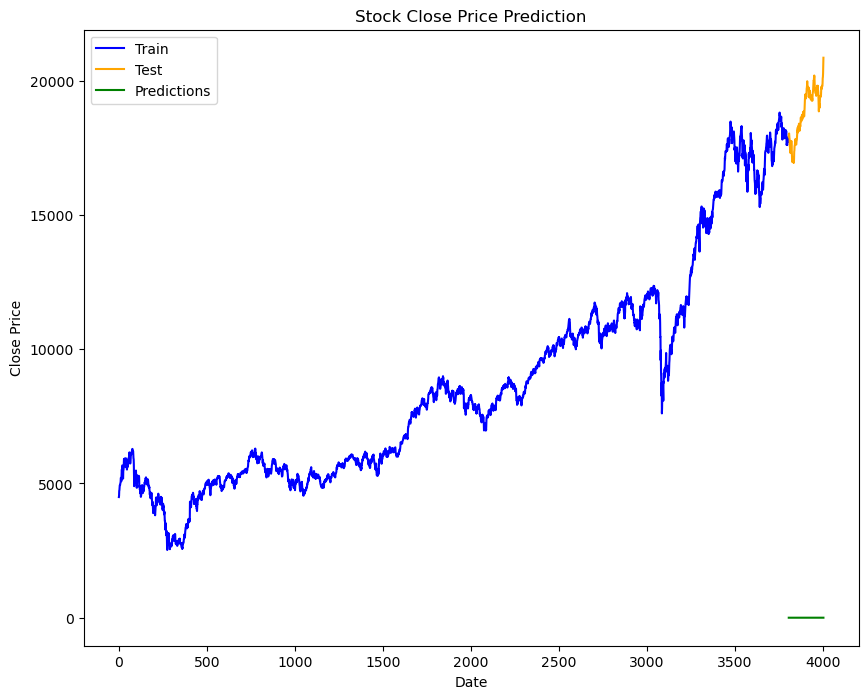

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame, 'training' is the index where you split the data
train = df[:training] 
test = df[training:].copy()  # Use .copy() to avoid the SettingWithCopyWarning

test.loc[:, 'Predictions'] = pred  # Ensure using .loc to set values

plt.figure(figsize=(10, 8))
plt.plot(train['Close'], label='Train', color='blue')
plt.plot(test['Close'], label='Test', color='orange')
plt.plot(test['Predictions'], label='Predictions', color='green')
plt.title('Stock Close Price Prediction')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.legend()
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [3717, 3577]

In [71]:
print(X_train.shape)
print(Y_train.shape)


(3717, 60, 1)
(3577,)


In [72]:
from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size=0.1, random_state=2022)


In [ ]:
grid.fit(X_train, Y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  10.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   5.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   5.9s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   2.8s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   3.2s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.5s
[CV] END .....................C=0.1, gamma=1, k

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, Y_train)

# Get the best parameters and train the model
best_params = grid.best_params_
best_model = grid.best_estimator_
